[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/prestrepoh/NLP-techniques-for-topic-extraction/blob/main/complete-thesis.ipynb)

# Multilabel Topic Classification for Software Product Reviews
Pablo Restrepo,  
*Department of Informatics, Technical University of Munich (TUM), Boltzmannstr. 3, 85748 Garching, Germany*  
pablo.restrepo@tum.de

## Introduction



Topic extraction is a technique from natural language processing (NLP) that identifies the different topics present in a text. This technique can be divided in two different categories: unsupervised topic extraction (topic modeling), which clusters unlabeled data by topic similarity (Alghamdi & Alfalqi, 2015), and supervised topic extraction (topic classification), which is used to identify the topics or theme of a text from a list of predefined labels (Minaee et al., 2020).

In the last years, the growth of the web and social media platforms has allowed us to gather enormous quantities of textual data (Mei et al., 2008). In particular, the review systems offered by software stores like Google play Store and Apple App store has allowed us to have access to millions of reviews of software products, which can be used for many different NLP applications in a variety of areas. In addition to this, NLP has emerged in the last decade as a useful tool assist in the software development process, and has been used for many tasks including automated risk identification (Vijayakumar & Arun, 2017), Requirement Engineering (Nazir et al., 2017) and Automatic test cases generation (Allala et al., 2019).

When developing software products, it is important to be able to identify early when there are bugs or problems present, to correct them as soon as possible. Also, it is necessary to be able to understand which features are liked or disliked by the users to improve the applications being developed. For this purpose, topic extraction techniques can be used to identify the topics of the comments given by the users of a particular applications in a software store, which can be useful to help find bugs and understand what the users like or dislike from the software product.

In this paper, we will investigate different topic classification techniques applied to reviews of software products written by users in the Google Play store. For this, we will compare the results obtained after applying 4 classical methods for text classification techniques: Naïve Bayes, Support Vector Classifier, Logistic Regression and K-Nearest Neighbors, and three transformer-based methods based on BERT, RoBERTa and XLNet to a dataset consisting of 1048575 reviews from the Google Play Store, labeled with 33 different topics.

## Related Work


Many different techniques have been used for text classification in the past, including Naïve Bayes (Qu et al., 2012; Wang & Manning, 2012), Support Vector Machines (Quercia et al., 2012; Wang & Manning, 2012), Logistic Regression (Iman et al., 2017), Bag of words (Lee et al., 2011), graph-based methods (Cordobés et al., 2014; Varga et al., 2014) and deep learning methods (Bengio et al., 2003).

The first methods based on deep learning underperformed classical methods, and for this reason were not widely used. Despite this, a paradigm change was produced when larger embedding models started being trained in much larger data. After this happened, multiple methods based on deep learning started being widely used including CNN-Based Models, RNN-Based Models, Siamese Neural Networks, Graph Neural Networks and LSTMs (Minaee et al., 2020). In 2017, Google introduced the transformer model, which is based exclusively in attention mechanisms and was more parallelizable than previous deep learning architectures (Vaswani et al., 2017). Following this, multiple transformer-based models were developed including GPT (Radford, 2018), GPT-2 (Radford et al., 2019) and BERT (Devlin et al., 2019). According to the quantitative results obtained by Minaee et al. (2020) after evaluating multiple methods in the DBpedia dataset, XLNet  is the state of the art model for the task of topic classification, closely followed by BERT.

Despite the success of deep learning-based methods in the NLP area, classical methods like Naïve Bayes are still widely used in practice (Webb, 2016), this is in part, because deep learning methods require enormous amount of data in order to obtain good results, and in occasions underperform classic methods when there is few training data available (Anding et al., 2019).

This paper explores the task of multi-label topic classification in the context of software products reviews by evaluating different text classification techniques in a dataset that contains reviews from the Google Play store, labeled with 33 different topics. The main contribution of this paper is to evaluate and compare the performance of different classic and deep-learning topic classification techniques in the particular domain of software product reviews, which can be useful to develop tools that assist in the process of developing and maintaining software products.

## Fundamentals



### Natural Language Processing
According to Chowdhary (2020, p. 603), “Natural Language Processing (NLP) is an area of research and application that explores how computers can be used to understand and manipulate natural language text or speech to do useful things”. This area includes the study of text classification and topic classification.


### Text classification
Ikonomakis et al. (2005, p. 1) Defines text classification as “the task of classifying a document under a predefined category. More formally, if di is a document of the entire set of documents D and (c1,c2,…cn) is the set  of  all  the  categories,  then  text  classification  assigns one category cj to a document di”. In our particular study case, the set of documents D consists of a the dataset with reviews from the Google Play Store, and our set of categories is the 33 topics present in the dataset.


### Topic Classification
Topic classification is a subtask of text classification, that according to the definition of  (Minaee et al., 2020, p. 3), “aims to identify the theme or topics of a text (e.g., whether a product review is about “customer support” or “ease of use”)”.


### Naïve Bayes
The Naïve Bayes algorithm is defined by Webb (2016, p. 1) as “a simple learning algorithm that utilizes Bayes’ rule together with a strong assumption that the attributes are conditionally independent given the class”. He also says that “While this independence assumption is often violated in practice, Naïve Bayes nonetheless often delivers competitive classification accuracy.  Coupled with its computational efficiency and many other desirable features, this leads to naïve Bayes being widely applied in practice”. In the NLP area, when using the Naïve Bayes, the count of words is usually used as features to the classifier.


### Support Vector Classifier (SVC)
A SVC, is a classifier based on Support Vector Machines (SVM). According to Srivastava and Bhambhu (2010, p. 2), “SVM map input vector to a higher dimensional space where a maximal separating hyperplane is constructed. Two parallel hyperplanes are constructed on each side of the hyperplane that separate the data. The separating hyperplane is the hyperplane that maximize the distance between the two parallel hyperplanes.” As in the Naïve Bayes classifier, in NLP, usually the words contained in the sentence are used as features of the classifier.


###Logistic Regression
Logistic regression is a mathematical model based on the logistic function, that can be used to describe the relationship of multiple variables. According to Richardson (2011, pp. 5-7), “The fact that the logistic function f(z) ranges between 0 and 1 is the primary reason the logistic model is so popular. The model is designed to describe a probability, which is always some number between 0 and 1.” This model can help classify text in NLP by using the words present in the text as features.


###K-nearest neighbor
KNN is a classification algorithm that according to Yong et al. (2009, p. 232), “predicts the test sample’s category according to the K training samples which are the nearest neighbors to the test sample and judge it to that category which has the largest category probability.”. In our particular study, we will be using the approach described by Spyromitros-Xioufis et al. (2008) for doing multilabel classification using the KNN algorithm.


###Transformer
Vaswani et al. (2017, p. 2) describes the Transformer as a “model architecture eschewing recurrence and instead relying entirely on an attention mechanism to draw global dependencies between input and output. The Transformer allows for significantly more parallelization and can reach a new state of the art in translation quality”.
In this architecture, and encoder and a decoder are used as shown in the following Figure:

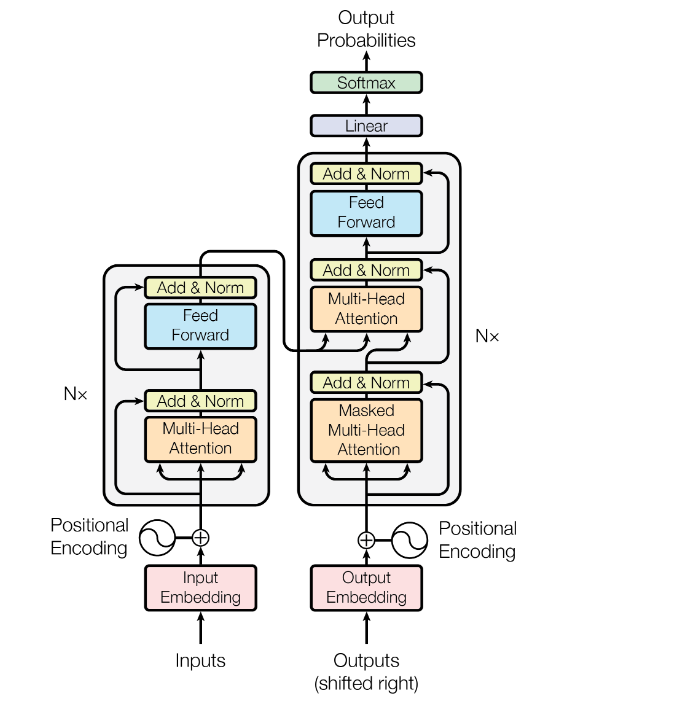

*Note: from Vaswani, Ashish, et al. “Attention Is All You Need.” ArXiv:1706.03762 [Cs], Dec. 2017. arXiv.org, http://arxiv.org/abs/1706.03762.*

This model uses Scaled Dot-Product Attention and Multi-Head Attention.


#### Scaled Dot-Product Attention
In the paper by Vaswani et al. (2017, p. 4), Scaled Dot-Product Attention is defined as and attention mechanism on which “the input consists of queries and keys of dimension $d_k$, and values of dimension $d_v$. We compute the dot products of the query with all keys, divide each by $\sqrt{d_k}$, and apply a softmax function to obtain the weights on the values. In practice, we compute the attention function on a set of queries simultaneously, packed together into a matrix $Q$. The keys and values are also packed together into matrices $K$ and $V$.”
The scaled dot-product attention is calculated using the equation:

$$ {Attention}(Q, K, V) = {softmax}(\frac{QK^{T}}{\sqrt{d_k}})V $$

#### Multi-Head Attention
Vaswani et al. (2017, p. 4) says: “Instead of performing a single attention function with $d_{model}$-dimensional keys, values and queries, we found it beneficial to linearly project the queries, keys and values $h$ times with different, learned linear projections to $d_k$,$d_k$ and $d_v$ dimensions, respectively. On each of these projected versions of queries, keys and values we then perform the attention function in parallel, yielding $d_v$-dimensional output values.  These are concatenated and once again projected, resulting in the final values”.  
This is depicted in the equation:
$$ \text{MultiHead}\left(\textbf{Q}, \textbf{K}, \textbf{V}\right) = \left[\text{head}_{1},\dots,\text{head}_{h}\right]\textbf{W}_{0}$$  
$$\text{where} \text{ head}_{i} = \text{Attention} \left(\textbf{Q}\textbf{W}_{i}^{Q}, \textbf{K}\textbf{W}_{i}^{K}, \textbf{V}\textbf{W}_{i}^{V} \right) $$  

Scaled Dot-Product Attention and Multi-Head Attention are depicted in the following figure:

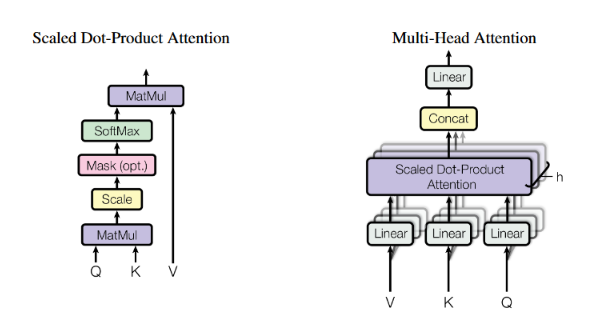

*Note: from Vaswani, Ashish, et al. “Attention Is All You Need.” ArXiv:1706.03762 [Cs], Dec. 2017. arXiv.org, http://arxiv.org/abs/1706.03762.*

### BERT
BERT stands for Bidirectional Encoder Representations from Transformers. Devlin et al. (2019, p. 1), says that “Unlike recent language representation models, BERT is designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers.  As a result, the pre-trained BERT model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial task-specific architecture modifications.”. BERT is the current state of the art embedding model (Minaee et al., 2020).


### RoBERTa
RoBERTa is an improved recipe for training BERT models. (Liu et al., 2019). In this model, a few changes were introduced to the original BERT model. According to Liu et al. (2019, p. 1), these modification s include: “(1) training the model longer, with bigger batches, over more data; (2) removing the next sentence prediction objective; (3) training on longer sequences; and (4) dynamically changing the masking pattern applied to the training data”.


### XLNet
XLNet is the current state of the art in the task of topic classification (Minaee et al., 2020). Yang et al. (2020, p. 1), defines XLNet as a “generalized autoregressive pretraining method that enables learning bidirectional contexts by maximizing the expected likelihood over all permutations of the factorization order and overcomes the limitations of BERT thanks to its autoregressive formulation.  Furthermore, XLNet integrates ideas from Transformer-XL, the state-of-the-art autoregressive model, into pretraining.”

## Solution Approach


### Notebook configuration
Before starting our data analysis, we will perform apply some configurations to our notebook, including the installation of dependencies, and the configuration of our module PATH, so the notebook can find our helper classes.



####Configuring module path and mounting Drive if running in Google Colab

In [ ]:
import sys
import os

#Function to install notebook dependencies
def install_dependecies():
  !pip install pandas
  !pip install numpy

#Configure PATH variables and mount Drive if running in Google Colab
if 'google.colab' in str(get_ipython()):
  from google.colab import drive

  root_PATH = '/content/drive/My Drive/nlp-seminar/repository'
  drive_mount_location = '/content/drive'
  module_path = root_PATH + '/src'
  
  drive.mount(drive_mount_location, force_remount=True)
  sys.path.append(root_PATH)

else:
  root_PATH = os.path.abspath("../../..")
  module_path = os.path.abspath(os.path.join('../../../src'))

install_dependecies()

%load_ext autoreload
%autoreload 2

if module_path not in sys.path:
    sys.path.append(module_path)

Mounted at /content/drive


#### Importing libraries

In [ ]:
import pandas as pd
import numpy as np

####Configuration variables

In [ ]:
data_url = 'https://drive.google.com/u/1/uc?id=1HMhft85XKGgYRD69wUzGiUWzD3PAgnqZ&export=download'
data_PATH = root_PATH + '/data'

####Downloading dataset

In [ ]:
!gdown --id 1HMhft85XKGgYRD69wUzGiUWzD3PAgnqZ -O $data_PATH/data.csv

Downloading...
From: https://drive.google.com/uc?id=1HMhft85XKGgYRD69wUzGiUWzD3PAgnqZ
To: /content/drive/My Drive/nlp-seminar/repository/data/data.csv
134MB [00:00, 152MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BavA_6Sm3u6YguU-u51_wQAlmqWNhTzf
To: /content/drive/My Drive/nlp-seminar/repository/data/test.csv
27.9MB [00:00, 106MB/s] 
Downloading...
From: https://drive.google.com/uc?id=104YhjBtZe60wOua-5N-qrtQWX-aEX2bh
To: /content/drive/My Drive/nlp-seminar/repository/data/train.csv
130MB [00:00, 134MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wWwbLsv_2zEIHEuyPDwJYrixC1x-KuRQ
To: /content/drive/My Drive/nlp-seminar/repository/data/validation.csv
27.8MB [00:00, 53.3MB/s]


### Exploratory Data Analysis (EDA)

Understanding the data being used is an important step on any data science project. In this section, we will explore the dataset that we will be using for our multilabel topic classification tasks.


#### Defining configuration variables

### References

Alghamdi, R., & Alfalqi, K. (2015). A Survey of Topic Modeling in Text Mining. International Journal of Advanced Computer Science and Applications, 6. https://doi.org/10.14569/IJACSA.2015.060121  

Allala, S. C., Sotomayor, J. P., Santiago, D., King, T. M., & Clarke, P. J. (2019, 15-19 Jul 2019). Towards Transforming User Requirements to Test Cases Using MDE and NLP. 2019 IEEE 43rd Annual Computer Software and Applications Conference (COMPSAC),  

Anding, K., Haar, L., Polte, G., Walz, J., & Notni, G. (2019). Comparison of the performance of innovative deep learning and classical methods of machine learning to solve industrial recognition tasks. Proc.SPIE,  

Bengio, Y., Ducharme, R., Vincent, P., & Janvin, C. (2003). A neural probabilistic language model. J. Mach. Learn. Res., 3(null), 1137–1155. 
Chowdhary, K. R. (2020). Natural Language Processing. In K. R. Chowdhary (Ed.), Fundamentals of Artificial Intelligence (pp. 603-649). Springer India. https://doi.org/10.1007/978-81-322-3972-7_19   

Cordobés, H., Fernández Anta, A., Chiroque, L., Pérez, F., Redondo, T., & Santos, A. i. (2014). Graph-based Techniques for Topic Classification of Tweets in Spanish. International Jorunal of Interactive Multimedia and Artificial Intelligence, 2, 31-37. https://doi.org/10.9781/ijimai.2014.254  

Devlin, J., Chang, M.-W., Lee, K., & Toutanova, K. (2019). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. arXiv:1810.04805 [cs]. http://arxiv.org/abs/1810.04805  

Ikonomakis, E., Kotsiantis, S., & Tampakas, V. (2005). Text Classification Using Machine Learning Techniques. WSEAS transactions on computers, 4, 966-974. 
Iman, Z., Sanner, S., Bouadjenek, M. R., & Xie, L. (2017). A Longitudinal Study of Topic Classification on Twitter. ICWSM,  

Lee, K., Palsetia, D., Narayanan, R., Patwary, M. M. A., Agrawal, A., & Choudhary, A. (2011). Twitter Trending Topic Classification. https://doi.org/10.1109/ICDMW.2011.171  

Liu, Y., Ott, M., Goyal, N., Du, J., Joshi, M., Chen, D., Levy, O., Lewis, M., Zettlemoyer, L., & Stoyanov, V. (2019). RoBERTa: A Robustly Optimized BERT Pretraining Approach. arXiv:1907.11692 [cs]. http://arxiv.org/abs/1907.11692  

Mei, Q., Cai, D., Zhang, D., & Zhai, C. (2008). Topic modeling with network regularization Proceedings of the 17th international conference on World Wide Web, Beijing, China. https://doi.org/10.1145/1367497.1367512  

Minaee, S., Kalchbrenner, N., Cambria, E., Nikzad, N., Chenaghlu, M., & Gao, J. (2020). Deep Learning Based Text Classification: A Comprehensive Review. arXiv e-prints, arXiv:2004.03705. https://ui.adsabs.harvard.edu/abs/2020arXiv200403705M  

Nazir, F., Butt, W. H., Anwar, M. W., & Khan Khattak, M. A. (2017, 2017//). The Applications of Natural Language Processing (NLP) for Software Requirement Engineering - A Systematic Literature Review. Information Science and Applications 2017, Singapore.  

Qu, B., Cong, G., Li, C., Sun, A., & Chen, H. (2012). An evaluation of classification models for question topic categorization. Journal of the American Society for Information Science and Technology, 63. https://doi.org/10.1002/asi.22611  

Quercia, D., Askham, H., & Crowcroft, J. (2012). TweetLDA: Supervised topic classification and link prediction in Twitter. https://doi.org/10.1145/2380718.2380750  

Radford, A. (2018). Improving Language Understanding by Generative Pre-Training.  

Radford, A., Wu, J., Child, R., Luan, D., Amodei, D., & Sutskever, I. (2019). Language Models are Unsupervised Multitask Learners.  

Richardson, A. (2011). Logistic Regression: A Self‐Learning Text, Third Edition by David G. Kleinbaum, Mitchel Klein. International Statistical Review, 79, 296-296. https://doi.org/10.2307/41305046  

Spyromitros-Xioufis, E., Tsoumakas, G., & Vlahavas, I. (2008). An Empirical Study of Lazy Multilabel Classification Algorithms (Vol. 5138). https://doi.org/10.1007/978-3-540-87881-0_40  

Srivastava, D., & Bhambhu, L. (2010). Data classification using support vector machine. Journal of Theoretical and Applied Information Technology, 12, 1-7.  

Varga, A., Cano Basave, A., Rowe, M., & Ciravegna, F. (2014). Linked knowledge sources for topic classification of microposts: A semantic graph-based approach. Journal of Web Semantics. https://doi.org/10.1016/j.websem.2014.04.001  

Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., Kaiser, L., & Polosukhin, I. (2017). Attention Is All You Need. arXiv:1706.03762 [cs]. http://arxiv.org/abs/1706.03762  

Vijayakumar, K., & Arun, C. (2017). Automated risk identification using NLP in cloud based development environments. Journal of Ambient Intelligence and Humanized Computing. https://doi.org/10.1007/s12652-017-0503-7  

Wang, S., & Manning, C. (2012, jul). Baselines and Bigrams: Simple, Good Sentiment and Topic Classification. Proceedings of the 50th Annual Meeting of the Association for Computational Linguistics (Volume 2: Short Papers), Jeju Island, Korea.
Webb, G. (2016). Naïve Bayes. In (pp. 1-2). https://doi.org/10.1007/978-1-4899-7502-7_581-1  

Yang, Z., Dai, Z., Yang, Y., Carbonell, J., Salakhutdinov, R., & Le, Q. V. (2020). XLNet: Generalized Autoregressive Pretraining for Language Understanding. arXiv:1906.08237 [cs]. http://arxiv.org/abs/1906.08237  

Yong, Z., Youwen, L., & Shixiong, X. (2009). An Improved KNN Text Classification Algorithm Based on Clustering. Journal of Computers, 4. https://doi.org/10.4304/jcp.4.3.230-237
